# Exercise: Spam Detection Using Decision Trees and Feature Engineering

## Objective
You will build and evaluate spam detection models on the UCI SMS Spam Collection Dataset.
> This will involve
- creating custom features
- applying TF-IDF vectorization
- experimenting with decision tree classifiers, and
- evaluating their effectiveness.

## Dataset
The dataset consists of SMS messages labeled as 'spam' or 'ham' (not spam) and is accessible on Kaggle. You can familiarize yourself with the dataset's structure and contents by reviewing its description on Kaggle.

## Feature Extraction
- In one scenario, you will use a custom features approach, and in the other, TF-IDF vectors.

### Model Experiments
- You will separately train two decision tree classifiers, one using the custom features, the other one using TF-IDF vectors.

### Step 1: Import the Dataset

Download the spam dataset from [Kaggle](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset?resource=download) and load it into your environment, ensuring the correct text encoding to properly import the SMS messages. HINT: The dataset is in 'latin-1' encoding.

In [4]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'https://github.com/azagsam/NLP-Course-Tutorials-Digital-Linguistics/raw/master/additional_materials/notebooks/spam.csv'
df = pd.read_csv(file_path, encoding='latin-1')  # Adjust encoding as necessary

# Rename variables
df.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
# Display the first few rows to understand its structure
print(df.head())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...




### Step 2: Split the data
- Manually divide the dataset into training and test sets, keeping a 70:30 ratio.


In [5]:
import numpy as np

# Split data into features and target variable
X = df['message']  # Features
y = df['label']    # Target variable

# Determine the split index
split_idx = int(len(X) * 0.7)

# Split into training and test sets
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Verify the sizes
print(X_train.shape)
print(y_train.shape)

(3900,)
(3900,)


 Ensure both sets are representative of the overall dataset by printing out the ratio between the two labels.

In [6]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

label
ham     0.866923
spam    0.133077
Name: proportion, dtype: float64
label
ham     0.863636
spam    0.136364
Name: proportion, dtype: float64



### Approach 1: Custom Bag of Words/ Bag of Features:

The features of our texts can be the counts/frequency of exclamation marks, uppercase words, or the presence of specific keywords (e.g., "free", "win", "urgent"), the message length etc.
> Use your creativity and intuition to identify characteristics that might distinguish spam from non-spam messages!

In [7]:
def extract_custom_features(message):
    words = message.split()
    unique_words = set(words)
    features = {
        'num_exclamation_marks': message.count('!'),
        'num_uppercase_words': sum(word.isupper() for word in words),
        'message_length': len(message),
        'num_digits': sum(c.isdigit() for c in message),
        'num_question_marks': message.count('?'),
        'num_hyperlinks': message.lower().count('http'),
        'num_sales_words': sum(message.lower().count(word) for word in ['win', 'free', 'offer', 'buy', 'discount', 'exclusive','hurry','token','update']),
        'num_unique_words': len(unique_words),  # Number of unique words in the message
        'num_money_symbols': sum(message.count(symbol) for symbol in ['$', '£', '€']),  # Count of money symbols
        'avg_word_length': sum(len(word) for word in words) / len(words) if words else 0,  # Average word length
    }
    return list(features.values())

# Apply custom feature extraction
X_train_custom = [extract_custom_features(msg) for msg in X_train]
X_test_custom = [extract_custom_features(msg) for msg in X_test]

# Convert the lists of custom features into NumPy arrays
X_train_custom_np = np.array(X_train_custom)
X_test_custom_np = np.array(X_test_custom)

# Verify number of features
print(X_train_custom_np.shape)
print(X_test_custom_np.shape)

(3900, 10)
(1672, 10)


#### Model training

Train a Decision Tree Classifier on the custom features.
> Experiment with various hyperparameters (e.g., `max_depth, min_samples_split, max_features, class_weight`)

See documentation on https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [8]:
from sklearn.tree import DecisionTreeClassifier

# Train the decision tree classifier on the custom features
clf_custom = DecisionTreeClassifier(max_depth=5)  # Example hyperparameter setting
clf_custom.fit(X_train_custom_np, y_train)
print('Model trained on custom features.')

Model trained on custom features.


## Evaluation
Determine the accuracy of your model on the test set.

In [9]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix


# Predict the labels on the test set
y_pred_custom = clf_custom.predict(X_test_custom_np)


# Calculate and print the accuracy
accuracy_custom = accuracy_score(y_test, y_pred_custom)
print(f"Accuracy with custom features: {accuracy_custom:.4f}")

confusion_matrix_print = confusion_matrix(y_test, y_pred_custom)
print(confusion_matrix_print)

Accuracy with custom features: 0.9737
[[1433   11]
 [  33  195]]


## Approach 2: Vectorizing words using TF-IDF


You will train the model on **TF-IDF Features**: Utilize `TfidfVectorizer` from `sklearn.feature_extraction.text` to convert the text messages into a matrix of TF-IDF features.

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Split data into features and target variable
X = df['message']  # Features
y = df['label']    # Target variable

# Determine the split index
split_idx = int(len(X) * 0.7)

# Split into training and test sets
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

###Model training



Train a Decision Tree Classifier on TF-IDF features.

> Experiment with various hyperparameters (e.g., `max_depth, min_samples_split, max_features, class_weight`)

See documentation on https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

# Example: Train with TF-IDF features
clf_tfidf = DecisionTreeClassifier(max_depth=7)
clf_tfidf.fit(X_train_tfidf, y_train)
print('Model trained on TF-IDF features.')

Model trained on TF-IDF features.


### Evaluation
- Determine the model accuracy on the test set. Additionally, you can consider other metrics such as precision, recall, and F1-score for a more rounded assessment (line 6).

In [12]:
# Use the model to predict the label of the test samples
y_pred_tfidf = clf_tfidf.predict(X_test_tfidf)

#Evaluate the accuracy of the model
# you can change 'accuracy_score' to 'precision_score' / 'recall_score' / 'f1_score' .. to get the result of a different evaluation metric
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
print(f"Accuracy with TF-IDF: {accuracy_tfidf:.4f}")

print(confusion_matrix(y_test, y_pred_tfidf))

Accuracy with TF-IDF: 0.9545
[[1423   21]
 [  55  173]]



## Results Visualization
- Display the outcomes of your experimental setups on a single plot to illustrate the accuracy of each model configuration.

Here, we are using a simple lineplot.


> Change the `example_parameters` in line 4 to a set of values for other parameters which you use to train (e.g. `max_features, class_weight` in line 11) and compare the models.

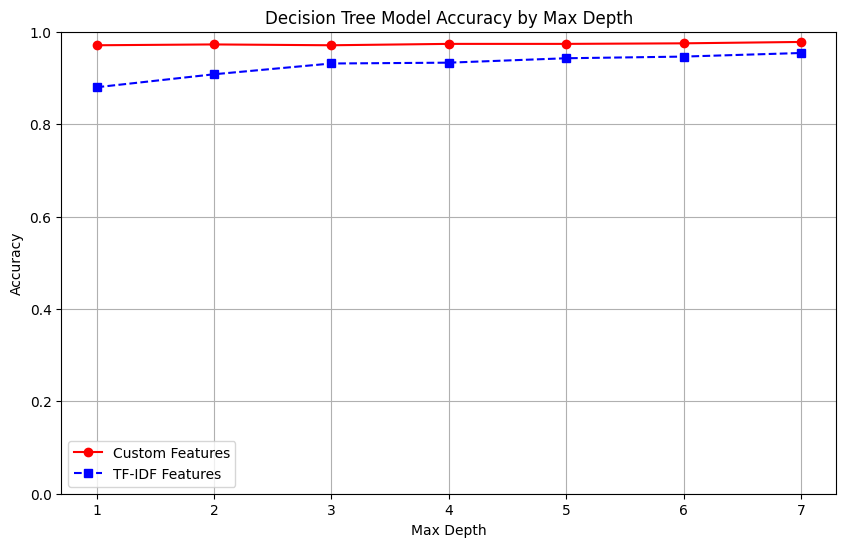

In [13]:
import matplotlib.pyplot as plt

# Example parameters tested in your experiments (we are currently passing this to the max_depth parameter)
example_parameters = [1,2,3,4,5,6,7]

accuracies_custom = []
accuracies_tfidf = []


for parameter in example_parameters:
    clf_custom = DecisionTreeClassifier(max_depth=parameter)
    clf_custom.fit(X_train_custom_np, y_train)
    y_pred_custom = clf_custom.predict(X_test_custom_np)
    accuracy_custom = accuracy_score(y_test, y_pred_custom)
    accuracies_custom.append(accuracy_custom)
    clf_tfidf = DecisionTreeClassifier(max_depth=parameter)
    clf_tfidf.fit(X_train_tfidf, y_train)
    y_pred_tfidf = clf_tfidf.predict(X_test_tfidf)
    accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
    accuracies_tfidf.append(accuracy_tfidf)


plt.figure(figsize=(10, 6))

# Plot results for custom features
plt.plot(example_parameters, accuracies_custom, marker='o', linestyle='-', color='r', label='Custom Features')

# Plot results for TF-IDF features
plt.plot(example_parameters, accuracies_tfidf, marker='s', linestyle='--', color='b', label='TF-IDF Features')

plt.title('Decision Tree Model Accuracy by Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set the y-axis to range from 0 to 1
plt.legend()
plt.grid(True)
plt.show()



### Analysis
> Examine the performance differences between models employing custom features and those using TF-IDF features. Which features and model configurations yielded the best results?

> Do you see any limitations of the decision tree algorithm in text classification task?

## Extra: Decision tree with GridSearch

GridSearch is a method to find the best parameters:
it performs an exhaustive search over the specified possible parameter values for an estimator.

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Convert custom features into NumPy arrays if not already done
X_train_custom_np = np.array(X_train_custom)
X_test_custom_np = np.array(X_test_custom)

# Decision tree classifier instance
dt_clf_custom = DecisionTreeClassifier()

# Define the parameter grid (all possible parameters) for the decision tree
param_grid_custom = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Setup GridSearchCV for custom features
grid_search_custom = GridSearchCV(estimator=dt_clf_custom, param_grid=param_grid_custom, cv=5, scoring='accuracy')

# Fit the model
grid_search_custom.fit(X_train_custom_np, y_train)

# Best parameters and best score
print("Best parameters (Custom Features):", grid_search_custom.best_params_)
print("Best score (Custom Features):", grid_search_custom.best_score_)


Best parameters (Custom Features): {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score (Custom Features): 0.9769230769230768


### TF-IDF vectorizer

In [15]:
# Define a pipeline
pipeline_tfidf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('dt_clf', DecisionTreeClassifier())
])

# Define the parameter grid, note the double underscores to specify pipeline steps
param_grid_tfidf = {
    'dt_clf__max_depth': [5, 10, 15, None],
    'dt_clf__min_samples_split': [2, 5, 10],
    'dt_clf__min_samples_leaf': [1, 2, 4]
}

# Setup GridSearchCV for TF-IDF features
grid_search_tfidf = GridSearchCV(estimator=pipeline_tfidf, param_grid=param_grid_tfidf, cv=5, scoring='accuracy')

# Fit the model
grid_search_tfidf.fit(X_train, y_train)  # Note: X_train here is the raw text data

# Best parameters and best score
print("Best parameters (TF-IDF Features):", grid_search_tfidf.best_params_)
print("Best score (TF-IDF Features):", grid_search_tfidf.best_score_)


Best parameters (TF-IDF Features): {'dt_clf__max_depth': None, 'dt_clf__min_samples_leaf': 1, 'dt_clf__min_samples_split': 5}
Best score (TF-IDF Features): 0.9638461538461538


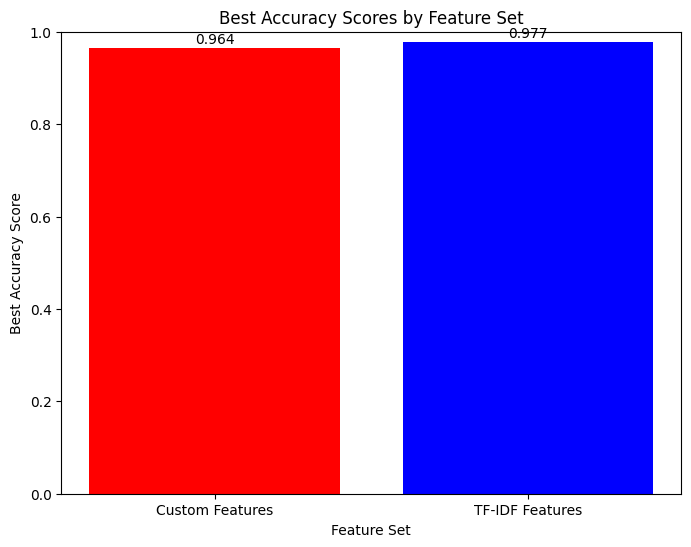

In [16]:
import matplotlib.pyplot as plt

# Feature set names
feature_sets = ['Custom Features', 'TF-IDF Features']

# Best scores
best_scores = [grid_search_tfidf.best_score_, grid_search_custom.best_score_]

plt.figure(figsize=(8, 6))
bars = plt.bar(feature_sets, best_scores, color=['red', 'blue'])

# Adding value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 3), ha='center', va='bottom')

plt.title('Best Accuracy Scores by Feature Set')
plt.xlabel('Feature Set')
plt.ylabel('Best Accuracy Score')
plt.ylim(0, 1)  # Assuming accuracy scores range from 0 to 1
plt.show()

# Text clustering based on TF-IDF features

We can also use the same TF-IDF features to perform unsupervised clustering.

To do that, we are going to use the KMeans algorithm and visualize the points and clusters using PCA (a way to reduce the dimensionality of our TF-IDF vectors).

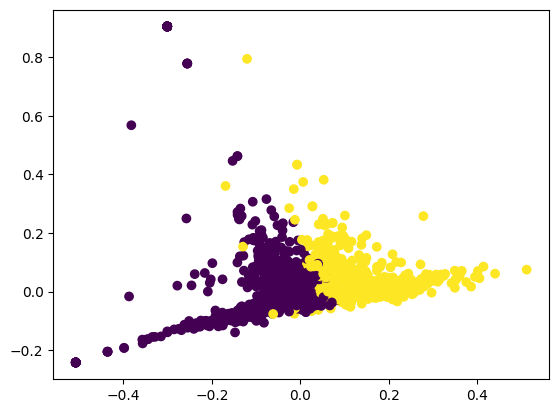

In [17]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


kmeans = KMeans(n_clusters=2, random_state=42)  # Example with 2 clusters
kmeans.fit(X_train_tfidf)


pca = PCA(n_components=2)
reduced_matrix = pca.fit_transform(X_train_tfidf.toarray())

plt.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1], c=kmeans.labels_)
plt.show()


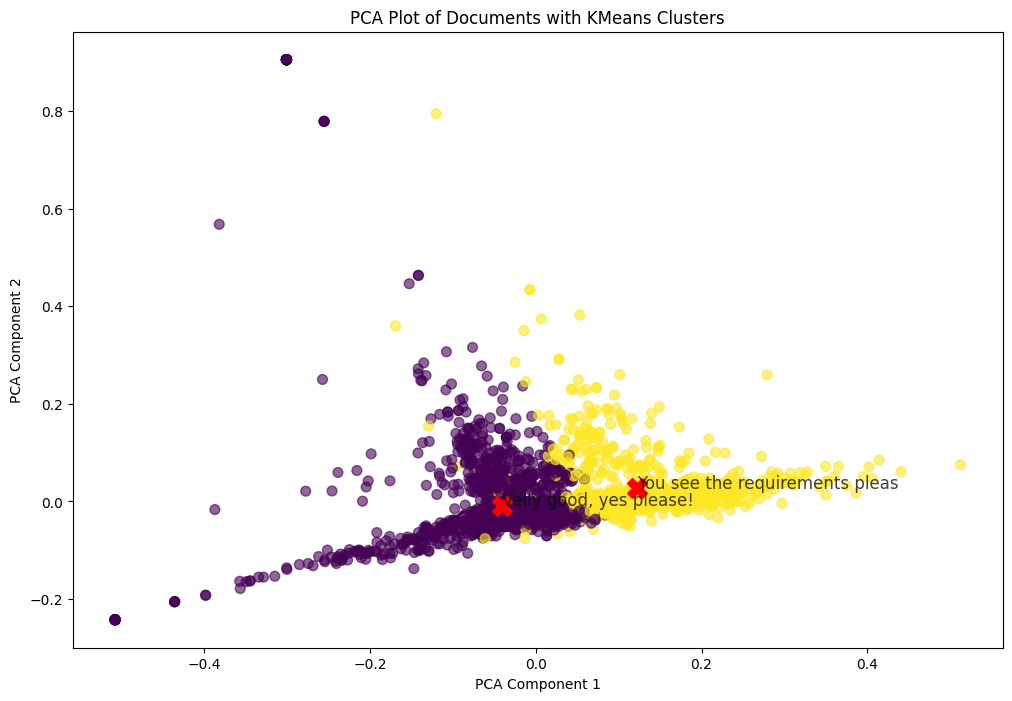

In [18]:
# Assuming you already have the trained kmeans and the tfidf matrix (X_train_tfidf)
# Reduce the dimensionality of the TF-IDF matrix for visualization
pca = PCA(n_components=2)
reduced_matrix = pca.fit_transform(X_train_tfidf.toarray())

# Plot the PCA scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.6)

# Label cluster centroids
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, c='red')


# Add text labels for the texts closest to the centroids
from sklearn.metrics import pairwise_distances_argmin_min
closest, _ = pairwise_distances_argmin_min(centroids_pca, reduced_matrix)
representative_texts = X.iloc[closest]

for i, (text,coordinates) in enumerate(zip(representative_texts,centroids_pca)):
    plt.text(coordinates[0], coordinates[1], text[:30], fontsize=12, alpha=0.75)


# Show the plot
plt.title('PCA Plot of Documents with KMeans Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


Does the clustering provide satisfactory results?

How do the results differ from the classification exercise above?

